# Exploring CMH Parking Violations

## Imports

* pandas

In [43]:
#%matplotlib inline
#import numpy as np

import pandas as pd
import osmnx as ox
#import matplotlib.pyplot as plt

### Loading data

[Columbus City Parking Violations and Ticket Status 2013-2018 -- COLUEXTRACT](https://discovery.smartcolumbusos.com/dataset/conduent/160c98a1_ad56_4658_8553_5ee8e7d0d953) - Smart Columbus

This dataset covers the parking violations identified by Parking Enforcement Officer (PEO) and the tickets issued for those violations. Also, the data identifies the status of the ticket (e.g., paid, dismissed, etc.,) This dataset covers years 2013 through 2018.

In [61]:
parking = pd.read_csv("../data/raw/160c98a1-ad56-4658-8553-5ee8e7d0d953.csv.gz", compression = 'gzip')

/Users/ovi/Library/Caches/pypoetry/virtualenvs/cmh-packing-violations-py3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (3,21,25,43,78,91,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
pd.set_option('display.max_columns', None)
parking.sample(15)

,nix dt,hrg offcr,dispo,badge,susp til,mail1 dt,iss dt,ent due,viol,ipp no,mail2 dt,conf dt2,fine,coll dt,pen4,corro,last seiz,hear proc,dis dt,mail1 pdt,bootbl ct,ticket,entity,plea,multno,tick typ,seiz dt,red,conf dt,meter,susp code,pen2,mail4 ty,mail4 dt,coll agcy,pen1,plt yr,hold rq dt,route,lat,plt exp,load dt,mail1 ty,seiz stat,pay prc dt,long,hear tm,pay batch,pay amt,pen3,mail5 ty,nix stat,ent ovp,mail2 pdt,nixtk dt,more susp,mail2 ty,location,mail5 pdt,deposit dt,nixtk stat,seizbl ct,time2,iss agcy,hold date,batch dt,boot ind,termdt,pen5,mail5 dt,make,due,hold ct,name reas,hear dt,cor dt,iss time,open ct,exclude,mail3 ty,pay type,dis pdt,pay meth,susp dt,hold stat,div,mail3 dt,mail4 pdt,overpd,pay src,more mail,more corr,mail3 pdt,ipp stat,batch,more pays,seiz ind,more hear
225882,0,NaN,0,19,0,0,2014252,$0.00,29,0,0,0,$25.00,0,$0.00,0,0,0,0,0,0,5563560000,3417045,NaN,0,NaN,0,$0.00,0,NI650,0,$0.00,0,0,NaN,$0.00,15,0,PVB,0,0,2014252,0,NaN,2014259,0,0,110,$25.00,$0.00,0,NaN,$0.00,0,0,NaN,0,PARK ST,0,2014259,NaN,0,0,0,0,2014253,NaN,0,$0.00,0,BMW,$0.00,0,NaN,0,0,2136,0,NaN,0,1,0,4,0,NaN,0.0,0,0,$0.00,7,NaN,NaN,0,NaN,201,NaN,NaN,NaN
707745,0,NaN,0,11,0,0,2013128,$0.00,13,0,0,0,$50.00,0,$0.00,0,0,0,0,0,0,5560996526,3304301,NaN,0,NaN,0,$0.00,0,NaN,0,$0.00,0,0,NaN,$0.00,14,0,PVB,0,0,2013128,0,NaN,2013134,0,0,173,$50.00,$0.00,0,NaN,$0.00,0,0,NaN,0,WS NO 3RD OREGON AVE,0,2013134,NaN,0,0,0,0,2013129,NaN,0,$0.00,0,FORD,$0.00,0,NaN,0,0,1236,0,NaN,0,1,0,4,0,NaN,0.0,0,0,$0.00,7,NaN,NaN,0,NaN,201,NaN,NaN,NaN
181870,0,NaN,0,13,0,0,2017140,$15.00,20,0,0,2017158,$25.00,0,$0.00,0,0,0,0,0,0,5567243002,3628184,NaN,0,NaN,0,$0.00,2017158,EG113,0,$0.00,0,0,NaN,$15.00,17,0,PVB,0,2017334,2017141,0,NaN,2017164,0,0,173,$25.00,$0.00,0,NaN,$0.00,0,0,NaN,0,RICH ST E,0,2017164,NaN,0,0,0,0,2017141,NaN,0,$0.00,0,CHEV,$15.00,0,R,0,0,1640,1,NaN,0,1,0,3,0,NaN,0.0,0,0,$0.00,1,NaN,NaN,0,NaN,201,NaN,NaN,NaN
47681,0,NaN,0,17,0,2013155,2013129,$0.00,29,0,0,2013149,$25.00,0,$0.00,0,0,0,0,2013150,0,5561662576,3304621,NaN,0,NaN,0,$0.00,2013149,F5,0,$0.00,0,0,NaN,$15.00,13,0,PVB,0,2013256,2013129,1,NaN,2013156,0,0,112,$40.00,$0.00,0,NaN,$0.00,0,0,NaN,0,GREENWOOD LOT,0,2013156,NaN,0,0,0,0,2013130,NaN,0,$0.00,0,TOYT,$0.00,0,R,0,0,1748,0,NaN,0,1,0,1,0,NaN,0.0,0,0,$0.00,1,NaN,NaN,0,NaN,201,NaN,NaN,NaN
9184,0,NaN,0,15,0,0,2014129,$0.00,49,0,0,0,$500.00,0,$0.00,0,0,0,0,0,0,5563072634,3345954,NaN,0,NaN,0,$0.00,0,NaN,0,$0.00,0,0,NaN,$0.00,16,0,PVB,0,0,2014129,0,NaN,2014136,0,0,150,$500.00,$0.00,0,NaN,$0.00,0,0,NaN,0,653 3RD ST S,0,2014136,NaN,0,0,0,0,2014130,NaN,0,$0.00,0,LEXU,$0.00,0,NaN,0,0,1455,0,NaN,0,1,0,2,0,NaN,0.0,0,0,$0.00,1,NaN,NaN,0,NaN,201,NaN,NaN,NaN
671865,0,NaN,0,7,0,0,2015189,$0.00,72,0,0,0,$50.00,0,$0.00,0,0,0,0,0,0,5564931624,3484463,NaN,0,NaN,0,$0.00,0,NaN,0,$0.00,0,0,NaN,$0.00,15,0,PVB,0,0,2015191,0,NaN,2015201,0,0,172,$50.00,$0.00,0,NaN,$0.00,0,0,NaN,0,NS KING AVE,0,2015201,NaN,0,0,0,0,2015191,NaN,0,$0.00,0,CHEV,$0.00,0,NaN,0,0,1018,0,NaN,0,1,0,1,0,NaN,0.0,0,0,$0.00,1,NaN,NaN,0,NaN,201,NaN,NaN,NaN
29290,0,NaN,0,2533,0,0,2016226,$0.00,19,0,0,0,$22.00,0,$0.00,46,0,0,0,0,0,5596488534,3571710,NaN,0,NaN,0,$0.00,0,NaN,0,$0.00,0,0,NaN,$0.00,0,0,NaN,0,0,2016235,0,NaN,2016236,0,0,64,$22.00,$0.00,0,NaN,$0.00,0,0,NaN,0,E 1ST AVE/N 6TH ST,0,2016236,NaN,0,0,0,0,2016235,NaN,0,$0.00,0,SUBA,$0.00,0,NaN,0,2016239,1555,0,NaN,0,1,0,4,0,NaN,0.0,0,0,$0.00,7,NaN,NaN,0,NaN,6,NaN,NaN,NaN
111905,0,NaN,0,13,0,2015104,2015072,$0.00,26,0,0,2015091,$50.00,0,$0.00,0,0,0,0,2015099,0,5564585452,3458673,NaN,0,NaN,0,$0.00,2015091,NaN,0,$0.00,0,0,NaN,$15.00,15,0,PVB,0,2015146,2015072,1,NaN,2015132,0,0,90,$65.00,$0.00,0,NaN,$0.00,0,0,NaN,0,AF 47 4TH AVE W,0,2015132,NaN,0,0,0,0,2015073,NaN,0,$0.00,0,FORD,$0.00,0,R,0,0,2218,0,NaN,0,1,0,4,0,NaN,0.0,0,0,$0.00,7,NaN,NaN,0,NaN,201,NaN,NaN,NaN
84713,0,NaN,0,5,0,0,2013129,$0.00,14,0,0,0,$50.00,0,$0.00,0,2015293,0,0,0,0,5561630914,3119360,NaN,0,NaN,2015294,$0.00,2015322,NaN,0,$0.00,0,0,NaN,$0.00,14,0,PVB,0,0,2013129,0,NaN,2013138,0,0,153,$50.00,$0

In [41]:
dictionary = pd.read_json("https://data.smartcolumbusos.com/api/v1/dataset/160c98a1-ad56-4658-8553-5ee8e7d0d953/dictionary")

pd.set_option('display.max_rows', None)
print(dictionary)


       type        name                                        description
0   integer      ENTITY  Unique system-generated number to identify lic...
1   integer      TERMDT  If a license plate was on a fleet and terminat...
2   integer      MULTNO  If a license plate was on a fleet, that fleet ...
3    string     ENT DUE                     Total amount due on the entity
4    string     ENT OVP                      Overpaid amount on the entity
5   integer     CONF DT  Date on which the BMV/Registry returned regist...
6   integer     HOLD CT  Total number of tickets on the entity on regis...
7   integer   LAST SEIZ          Date on which the vehicle was last seized
8    string   SEIZ STAT       Indicates if the vehicle is currently seized
9   integer     SEIZ DT  Date on which the vehicle was released on the ...
10  integer      NIX DT  Date the address corresponding to ticket was n...
11   string    NIX STAT            Indicates nixie on ticket-level address
12  integer   BOOTBL CT  

In [49]:
G = ox.graph_from_place('Columbus, Ohio, USA', network_type='drive')

In [50]:
type(G)
# can we cache this? it takes forever to download..

networkx.classes.multidigraph.MultiDiGraph

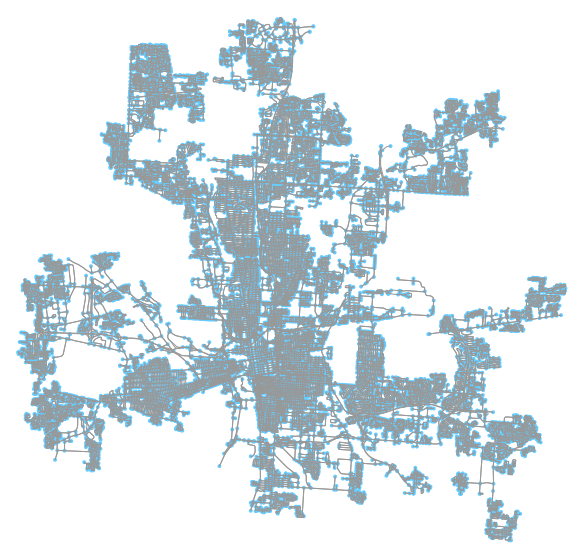

(<Figure size 984.789x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14fbb5d90>)

In [51]:
ox.plot_graph(G, fig_height=10)


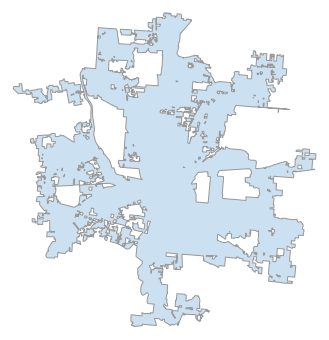

In [69]:

city = ox.gdf_from_place('Columbus, Ohio')
Gs = ox.plot_shape(ox.project_gdf(city))

cmh_boundaries = ox.project_gdf(city)
cmh_n = columbus_boundaries.bbox_north[0]
cmh_s = columbus_boundaries.bbox_south[0]
cmh_e = columbus_boundaries.bbox_east[0]
cmh_w = columbus_boundaries.bbox_west[0]

In [116]:
parking['lat_float'] = parking['lat'] / 1000000
parking['long_float'] = parking['long'] / 1000000 * -1

In [117]:
print (cmh_n, cmh_s, cmh_e, cmh_w)
fudge = 0.2
infraction_locations = parking[(parking['lat_float']  > cmh_s - fudge) &
                               (parking['lat_float']  < cmh_n + fudge) &
                               (parking['long_float'] > cmh_w - fudge) &
                               (parking['long_float'] < cmh_e + fudge) 
                              ]
infraction_locations[['lat_float', 'long_float']].sample(12)

40.157272 39.8086936 -82.7713119 -83.2101797


,lat_float,long_float
671771,39.953706,-83.000591
731625,39.978006,-83.003697
73336,39.990550,-83.011840
465145,39.956675,-82.995453
639474,39.978841,-83.005628
544444,39.959509,-82.994882
248661,39.995630,-83.014023
678163,40.002565,-83.000675
728187,39.965759,-82.993336
533565,39.992795,-83.006719
